# Exemplo sobre o gradiente descendente

#### Neste notebook, exploraremos a função de erro - em particular, a função do erro quadrático médio (MSE) para um problema de regressão.

#### Também treinaremos um modelo básico de Machine Learning usando o Gradiente Descente para ajustar uma função hipótese aos nossos dados e, consequentemente, minimizar o erro.

### Importando as bibliotecas

Abaixo, importamos quatro bibliotecas.

1.   [math](https://docs.python.org/3/library/math.html) - operações matemáticas básicas, e.g.: raíz quadrada, potência, etc.
2.   [matplotlib](https://matplotlib.org/) - visualização de dados
3.   [numpy](https://numpy.org/) - manipulação de arrays
4.   [tensorflow](https://www.tensorflow.org/) - biblioteca de código aberto para criar e treinar modelos de ML.

In [190]:
# importando as bibliotecas que serão usadas.
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### Gerando o conjunto de dados

Geramos o conjunto de dados que usaremos para encontrar a relação entre x e y, ou seja, chegar aos valores ótimos de $a_0$ e $a_1$.

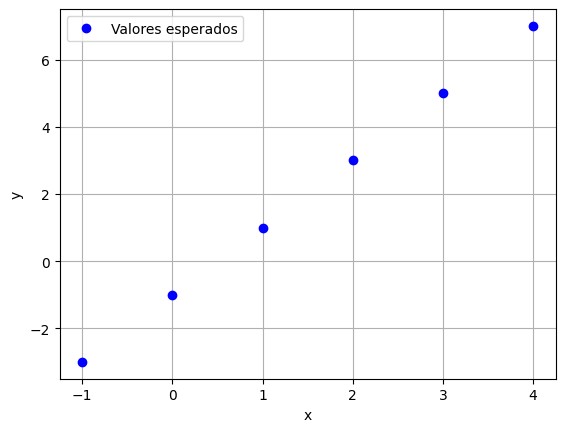

In [191]:
# Atributo.
x = np.array([-1, 0, 1, 2, 3, 4])

# Valores esperados (rótulos).
y = np.array([-3, -1, 1, 3, 5, 7])

# Plotando os dados.
plt.plot(x, y, 'bo', label='Valores esperados')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Definindo o modelo

Após observar a figura acima, notamos que uma reta é uma boa hipótese para explicar os dados do nosso conjunto.

Portanto, nossa função hipótese terá o seguinte formato

$$h(x) = \hat{y} = a_0 + a_1 x$$

### Explorando o erro

A célula abaixo calcula os valores $\hat{y}$ preditos para palpites de $a_0$ e $a_1$.

Vamos alterar os valores dos dois pesos e explorar como a saída da função hipótese e, consequentemente, o erro mudam para diferentes pesos.

In [192]:
# Edite os pesos a0 e a1 para obter valores de erro diferentes.
# Execute esta célula novamente quando terminar de definir os novos pesos.
# Seu y_hat será calculado como y_hat = ao + a1*x, então
# se a0 = -3 e a1 = 3, então y = -3 + 3x

a0 = -3 # < Coloque um valor aqui >
a1 = 1  # < Coloque um valor aqui >

y_hat = np.zeros((len(y), ))
for i, xi in enumerate(x):
    y_hat[i] = a0 + a1*xi     # Predições feitas com base nos valores definidos para os pesos.

print("y: " + str(y))
print("y_hat: " + str(y_hat))

y: [-3 -1  1  3  5  7]
y_hat: [-4. -3. -2. -1.  0.  1.]


### Comparando os dados com a função hipótese

Antes de prosseguirmos para o cálculo do erro, vamos visualizar a diferença entre os valores esperados e preditos.

No gráfico abaixo, os *pontos azuis* representam os valores esperados, os *pontos verdes* representam os valores preditos e as *linhas tracejadas vermelhas* representam a diferença entre os dois para cada amostra de dados individual.

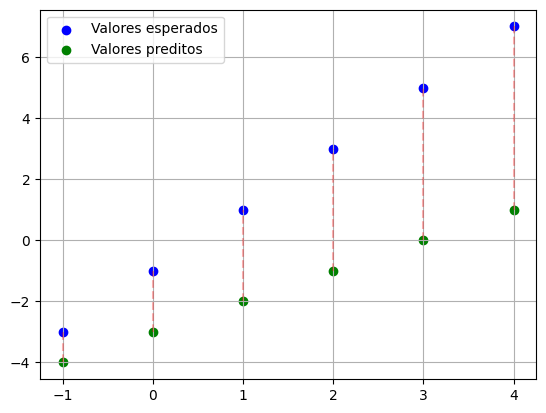

In [193]:
# Visualização do erro entre os valores esperados e preditos pela função hipótese.
plt.scatter(x, y, color='blue', label='Valores esperados')                    # valores esperados
plt.scatter(x, y_hat, color='green', label='Valores preditos')                # valores preditos
plt.vlines(x, ymin=np.minimum(y, y_hat), ymax=np.maximum(y, y_hat), color="red", linestyle='--', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

### Calculando o erro quadrático médio da hipótese

In [194]:
# Vamos calcular o EQM.
mse = 0
N = len(y) # Número total de amostras.
for i in range(0, N):
    squared_diff = (y[i] - y_hat[i]) ** 2
    mse += squared_diff

# Divide pelo número total de amostras.
mse /= N

print("MSE: " + str((mse)))

MSE: 15.166666666666666


### Minimizando o erro

A seguir, iremos minimizar o erro do nosso modelo de regressão, treinando-o com os dados fornecidos.

Para treinar nosso modelo de regressão linear, precisamos definir

+ (i) o modelo,
+ (ii) a função de erro e
+ (iii) o procedimento (i.e., algoritmo) de treinamento.

### Definindo o modelo de regressão linear

O modelo definido abaixo através da classe `Model` representa a função hipótese $\hat{y} = a_0 + a_1 x$.

Portanto, o modelo gera um valor de $\hat{y}$ para determinados $a_0$, $a_1$ e $x$ quando é chamado.

In [195]:
# Definindo nosso palpite inicial.
# Poderia ser qualquer valor, é aleatório.
A0_INICIAL = 10.0
A1_INICIAL = 10.0

# Define nosso modelo de regressão.
class Model(object):
    def __init__(self, a0=A0_INICIAL, a1=A1_INICIAL):
        # Inicializando os pesos como variáveis do Tensorflow, preciso definir como variaveis do tensorflow para calcular as derivadas.
        self.a0 = tf.Variable(a0)
        self.a1 = tf.Variable(a1)

    # O método call é chamado toda a vez que passamos um valor de x para o modelo.
    def __call__(self, x):
        # Implementação da função hipótese.
        return self.a0 + self.a1*x

**Observações**.:

+ Dado uma valor de $x$, o método `__call__()` retorna um valor de $\hat{y}$. Sabemos que o melhor formato para a função hipótese, ou seja, o modelo, é $\hat{y} = a_0 + a_1 x$. Portanto, o método `__call__()` retorna `self.a0 + self.a1 * x`.
+ O método `__call__()` é chamado implicitamente quando se passa a sequência de valores de $x$ para o objeto da classe `Model`.

### Definindo a função de erro

Em seguida, definimos nossa função de erro, que irá retornar o erro quadrático médio (MSE).

A função do Tensorflow `tf.reduce_mean()` calcula a média do tensor (i.e., vetor/array) de entrada. Leia mais [aqui](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean).

No caso do código abaixo, a função `tf.reduce_mean()` calcula a média dos erros individuais.

In [196]:
# Definindo nossa função de erro.
def erro(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

### Definindo o procedimento (algoritmo) de treinamento

Aqui, o algoritmo do gradiente descendente é usado para o treinamento do modelo.

Definimos uma função chamada `train` que executa **uma iteração do gradiente descendente** usando **TODAS** as amostras em nosso conjunto de dados (ou seja, usa todos os valores $x$ e $y$ disponíveis para treinamento).

Uma iteração do algoritmo de otimização do gradiente descendente envolve:

1. o cálculo do erro
2. o cálculo das derivadas da função de erro em relação ao pesos individuais (i.e., $a_0$ e $a_1$)
3. a atualização dos pesos do modelo com as derivadas calculadas (i.e., vetor gradiente)

**Classe GradientTape**

O cálculo das derivadas parciais da função de erro em relação aos pesos é feito automaticamente por um objeto da classe `GradientTape()` do TensorFlow.

Você pode aprender mais sobre a classe `GradientTape()` em https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [197]:
# Definindo o processo de treinamento (ou atualização dos pesos)
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        # Erro para o atual par de pesos.
        current_error = erro(model(inputs), outputs)

        # Aqui é onde diferenciamos a função de erro em relação aos pesos do modelo.
        da0, da1 = t.gradient(current_error, [model.a0, model.a1])      # derro/da0, derro/da1

        # E aqui é onde atualizamos os pesos do modelo com base no passo de aprendizagem escolhido.
        model.a0.assign_sub(learning_rate * da0)   # model.a0 = model.a0 - learning_rate*da0
        model.a1.assign_sub(learning_rate * da1)   # model.a1 = model.a1 - learning_rate*da1

        # Retorna o erro atual.
        return current_error

### Treinando o modelo

Agora que definimos todas as funções individuais que vamos precisar, é hora de juntá-las.

Inicialmente, definimos o passo de aprendizagem e o número de épocas de treinamento.

Em seguida, instanciamos o modelo.

Na sequência, treinamos o modelo por várias épocas. Para cada época, calculamos e armazenamos os valores dos pesos ($a_0$ e $a_1$) e o erro.

Observe a diminuição do erro à medida que as épocas passam.

In [198]:
# Passo de aprendizagem.
LEARNING_RATE = 0.1

# Número de épocas.
epochs = 100

# Instancia o modelo.
model = Model()

# Coletando o histórico de valores a0 e a1 para plotar mais tarde.
list_a0, list_a1 = [], []
erros = []

# Laço (loop) de treinamento.
for epoch in range(epochs):

    # Armazena os valores dos pesos.
    list_a0.append(model.a0.numpy())
    list_a1.append(model.a1.numpy())

    # Iteração de treinamento.
    current_error = train(model, x, y, learning_rate=LEARNING_RATE)

    # Armzena os erros ao longo das épocas de treinamento.
    erros.append(current_error)

    # Imprime os erros ao longo das épocas de treinamento.
    print('Época %2d: a0=%1.2f a1=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Época  0: a0=10.00 a1=10.00, loss=715.66669
Época  1: a0=5.40 a1=-1.57, loss=38.20575
Época  2: a0=5.19 a1=0.20, loss=21.63014
Época  3: a0=4.49 a1=0.20, loss=17.24073
Época  4: a0=3.93 a1=0.41, loss=13.86214
Época  5: a0=3.42 a1=0.57, loss=11.14769
Época  6: a0=2.97 a1=0.72, loss=8.96482
Época  7: a0=2.56 a1=0.85, loss=7.20938
Época  8: a0=2.19 a1=0.97, loss=5.79768
Época  9: a0=1.86 a1=1.08, loss=4.66241
Época 10: a0=1.57 a1=1.17, loss=3.74944
Época 11: a0=1.30 a1=1.26, loss=3.01525
Época 12: a0=1.06 a1=1.33, loss=2.42482
Época 13: a0=0.85 a1=1.40, loss=1.95001
Época 14: a0=0.66 a1=1.46, loss=1.56817
Época 15: a0=0.49 a1=1.52, loss=1.26110
Época 16: a0=0.33 a1=1.57, loss=1.01416
Época 17: a0=0.20 a1=1.61, loss=0.81557
Época 18: a0=0.07 a1=1.65, loss=0.65587
Época 19: a0=-0.04 a1=1.69, loss=0.52744
Época 20: a0=-0.14 a1=1.72, loss=0.42416
Época 21: a0=-0.23 a1=1.75, loss=0.34110
Época 22: a0=-0.31 a1=1.78, loss=0.27431
Época 23: a0=-0.38 a1=1.80, loss=0.22060
Época 24: a0=-0.44 a1=1.8

### Plotando os valores dos pesos ao longo das épocas de treinamento.

O gráfico abaixo mostra os valores dos pesos do modelo $a_0$ e $a_1$ (eixo y) ao longo das épocas (eixo x).


À medida que o modelo é treinado, observe como os valores de $a_0$ e $a_1$ convergem para os valores verdadeiros -1.0 e 2.0, respectivamente.

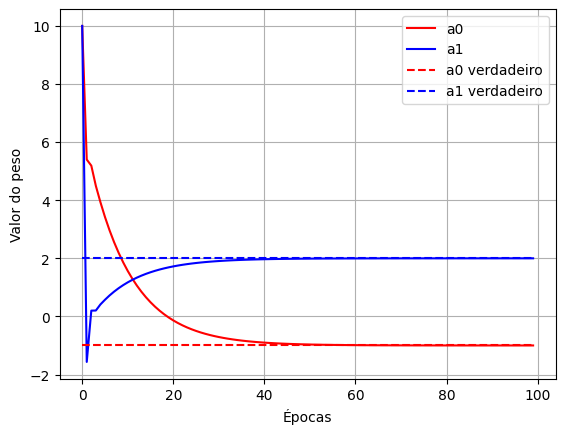

In [199]:
# Plote os valores de a0 e a1 para cada época de treinamento em relação aos valores verdadeiros.
TRUE_a0 = -1.0
TRUE_a1 = 2.0

xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b')
plt.plot([TRUE_a0] * epochs, 'r--', [TRUE_a1] * epochs, 'b--')
plt.legend(['a0', 'a1', 'a0 verdadeiro', 'a1 verdadeiro'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

**Observação**

+ Os pesos do modelo ainda estão distantes dos valores originais.

### Plotando o MSE ao longo das épocas de treinamento

O gráfico abaixo mostra o MSE ao longo do treinamento do modelo.

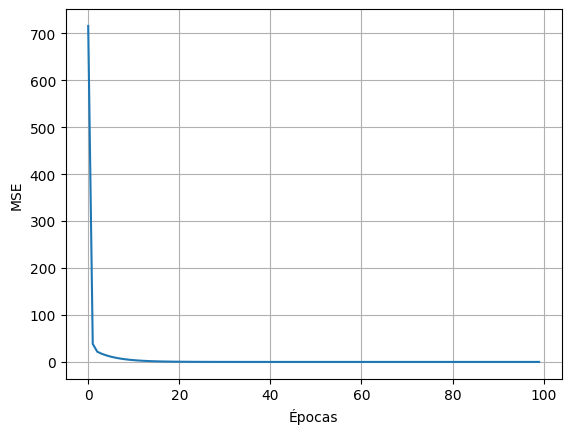

In [200]:
plt.plot(range(epochs), erros)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()

**Observação**

+ Como os dados não contêm ruído, percebe-se que o erro ainda não convergiu para um erro igual a 0.
+ O que podemos fazer?

-Mudar o passo de aprendizagem e a quantidade de épocas!!!!!!!!!

### Comparando os dados com a função hipótese

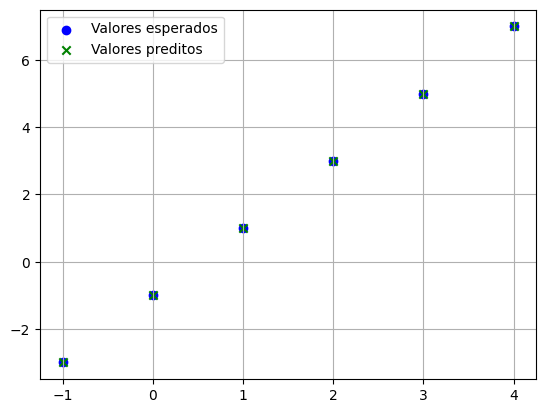

In [201]:
# valores esperados
plt.scatter(x, y, color='blue', label='Valores esperados')
# valores preditos
plt.scatter(x, model(x), marker='x', color='green', label='Valores preditos')
plt.legend()
plt.grid()
plt.show()